In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:

# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

# reflect the tables


In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = recent_date[0]
recent_date


'2017-08-23'

<AxesSubplot:xlabel='Date', ylabel='Precipitation'>

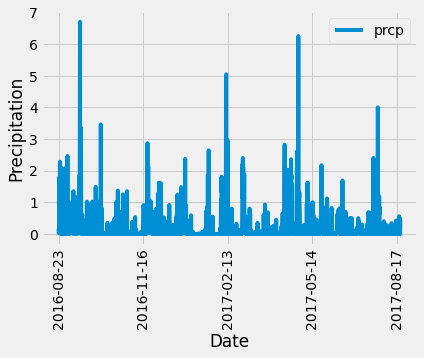

In [24]:
import datetime as dt
from dateutil.relativedelta import relativedelta
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#recent_date = dt.datetime.strptime(recent_date, "%Y-%m-%d")


# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
start_date
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= recent_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data)
precip_df = precip_df[precip_df['prcp'].notna()]
precip_df.set_index('date', inplace = True)
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(xlabel = "Date", ylabel= "Precipitation", rot=90)


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station).count()
station_total

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_id = station_counts[0][0]                                                                                                         
                                                                                                           
                                                                                                           
                                                                                                           

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_id)
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_id)
average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id)

Text(0.5, 1.0, 'Observed Temperatures for Station: USC00519281')

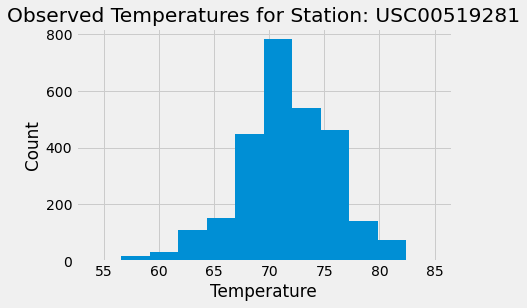

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active_id)
station_df = pd.DataFrame(hist_data)
hist = station_df.hist(column='tobs', bins=12)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title(f"Observed Temperatures for Station: {most_active_id}")


# Close session

In [30]:
# Close Session
session.close()

,station,tobs
0,USC00519281,70.0
1,USC00519281,62.0
2,USC00519281,74.0
3,USC00519281,75.0
4,USC00519281,74.0
...,...,...
2767,USC00519281,77.0
2768,USC00519281,77.0
2769,USC00519281,76.0
2770,USC00519281,76.0


[{'date': '2017-05-23'}]

'2017-08-23'

{'Min Temp:': 58.0, 'Max Temp:': 87.0, 'Avg Temp:': 74.59058295964125}